# Nummer 13
## a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(5)
r=np.random.uniform(size=int(1e5))
r_my_flux=((1-r))**(-10/17)

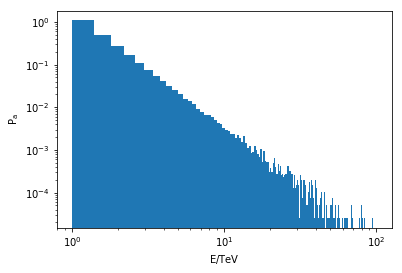

In [3]:
plt.hist(r_my_flux,density="true",bins=np.linspace(1,100,250))
plt.xlabel(r"$\mathrm{E}/\mathrm{TeV}$")
plt.ylabel(r"$\mathrm{P_{a}}$")
plt.xscale("log")
plt.yscale("log")
df = pd.DataFrame(data={"Energy":r_my_flux})

## b)

In [4]:
def P(E):
    return (1-np.exp(-E/2))**3
rdmy=np.random.uniform(0,1,int(1e5))
df["AcceptanceMask"]=pd.DataFrame(rdmy<P(r_my_flux))

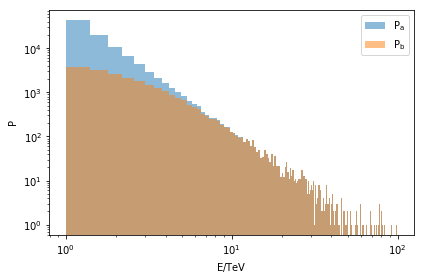

In [5]:
plt.hist(r_my_flux,bins=np.linspace(1,100,250),label=r"$\mathrm{P_{a}}$",alpha=0.5)
plt.hist(r_my_flux[df['AcceptanceMask'].values==True],bins=np.linspace(1,100,250),label=r"$\mathrm{P_{b}}$",alpha=0.5)
plt.xlabel(r"$\mathrm{E}/\mathrm{TeV}$")
plt.ylabel(r"$\mathrm{P}$")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.tight_layout()

## c)

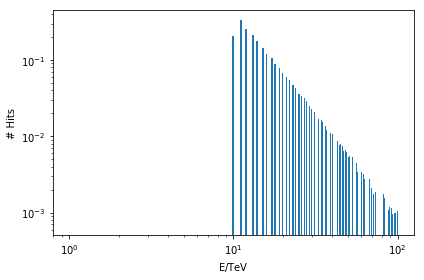

In [6]:
np.random.seed(5) #spinnt irgendwie

def Hits_norm(E):
    tmp = np.random.normal(10*E,2*E)
    if tmp.any()<=0:
        return Hits_norm()
    return tmp

def rdm_Hits(E):    
    u1, u2 = np.random.uniform(0,1),np.random.uniform(0,1)
    v1,v2=2*u1-1,2*u2-1
    s = u1**2+u2**2
    if s==0 or s>=1:
        return rdm_Hits(E)
    p=np.sqrt(-2*np.log(s)/s)
    if v1*p>0:
        return (np.sqrt(2*E)*(v1*p)+10*E).astype(int)
    else:
        return rdm_Hits(E)

df['NumberOfHits']=Hits_norm(r_my_flux)#wenigstens hier richtig 
plt.hist(rdm_Hits(r_my_flux),density="true",bins=np.linspace(1,100,250))
plt.xlabel(r"$\mathrm{E}/\mathrm{TeV}$")
plt.ylabel(r"# Hits")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

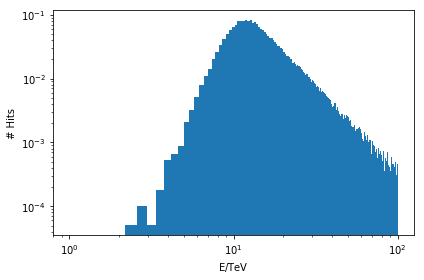

In [7]:
plt.hist(Hits_norm(r_my_flux),density="true",bins=np.linspace(1,100,250))
plt.xlabel(r"$\mathrm{E}/\mathrm{TeV}$")
plt.ylabel(r"# Hits")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

## d)

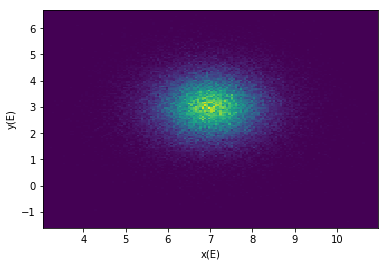

In [8]:
x_ort=np.random.normal(7,1/np.log10(df['NumberOfHits'].values+1))
y_ort=np.random.normal(3,1/np.log10(df['NumberOfHits'].values+1))
df['x'] = x_ort
df['y'] = y_ort
plt.hist2d(df['x'].values,df['y'].values,bins=150)
plt.xlabel("x(E)")
plt.ylabel("y(E)")
plt.show()

## e)

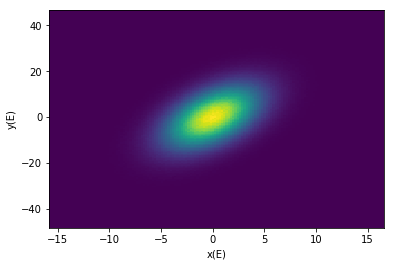

In [9]:
Hit_noise=10**(np.random.normal(2,1,int(1e7)))
x_noise=np.random.normal(0,3,int(1e7))
y_noise=np.random.normal(0,3,int(1e7))
x_noise_cor=np.sqrt(1-0.5**2)*x_noise+0.5*y_noise
y_noise_cor=3*y_noise
plt.hist2d(x_noise_cor,y_noise_cor,bins=150)
plt.xlabel("x(E)")
plt.ylabel("y(E)")
plt.show()

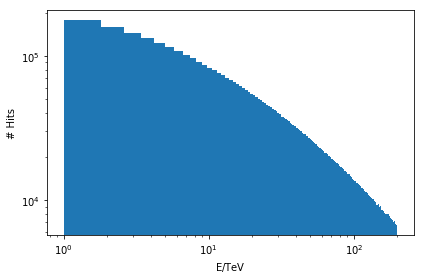

In [10]:
plt.hist(Hit_noise,bins=np.linspace(1,200,250))
plt.xlabel(r"$\mathrm{E}/\mathrm{TeV}$")
plt.ylabel(r"# Hits")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()

In [11]:
df2 = pd.DataFrame(data={"NumberOfHits":Hit_noise,"x":x_noise_cor,"y":y_noise_cor})
df.to_hdf(path_or_buf='./NeutrinoMC.hdf5', key='Signal')
df2.to_hdf(path_or_buf='./NeutrinoMC.hdf5', key='Background')